In [2]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

In [3]:
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options)
cost, pos = optimizer.optimize(fx.sphere, iters=100)

2024-09-12 10:15:02,953 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=2.55e-8
2024-09-12 10:15:03,085 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.545522246195126e-08, best pos: [-2.03634466e-05  1.58242069e-04]


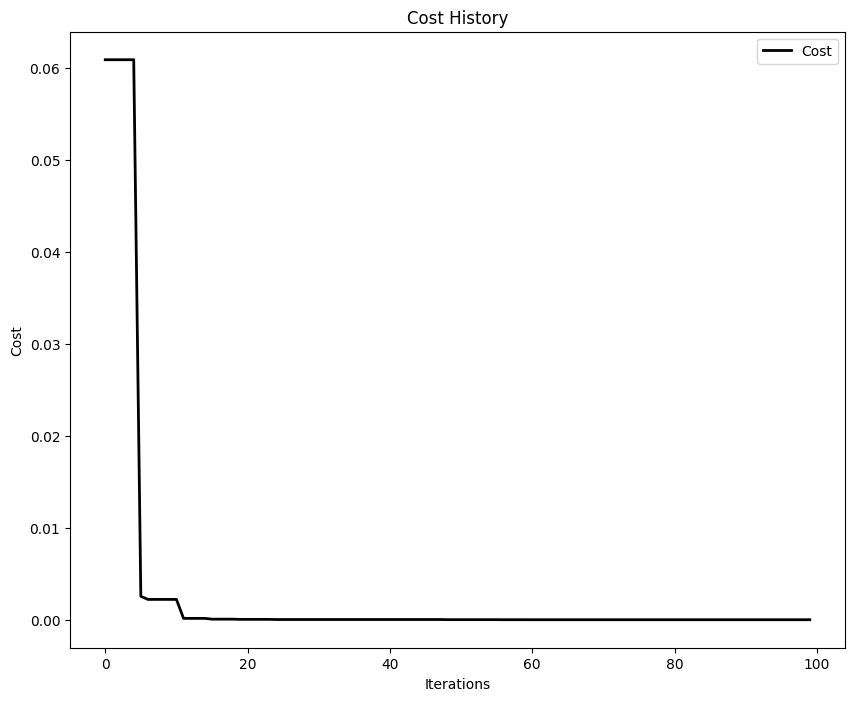

In [4]:
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

In [5]:
from pyswarms.utils.plotters.formatters import Mesher

In [6]:
# Initialize mesher with sphere function
m = Mesher(func=fx.sphere)

In [7]:
%%capture
# Make animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))

In [8]:
# Enables us to view it in a Jupyter notebook
animation.save('plot0.gif', writer='imagemagick', fps=10)
Image(url='plot0.gif')

2024-09-12 10:15:22,057 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.ImageMagickWriter'>
2024-09-12 10:15:22,059 - matplotlib.animation - INFO - MovieWriter._run: running command: 'C:\Program Files\ImageMagick-7.1.1-Q16-HDRI\magick.exe' -size 1000x800 -depth 8 -delay 10.0 -loop 0 rgba:- -layers OptimizePlus plot0.gif


In [9]:
# Obtain a position-fitness matrix using the Mesher.compute_history_3d()
# method. It requires a cost history obtainable from the optimizer class
pos_history_3d = m.compute_history_3d(optimizer.pos_history)

In [10]:
# Make a designer and set the x,y,z limits to (-1,1), (-1,1) and (-0.1,1) respectively
from pyswarms.utils.plotters.formatters import Designer
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)], label=['x-axis', 'y-axis', 'z-axis'])

In [11]:
%%capture
# Make animation
animation3d = plot_surface(pos_history=pos_history_3d, # Use the cost_history we computed
                           mesher=m, designer=d,       # Customizations
                           mark=(0,0,0))               # Mark minima

In [12]:
animation3d.save('plot1.gif', writer='imagemagick', fps=10)
Image(url='plot1.gif')

2024-09-12 10:17:07,722 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.ImageMagickWriter'>
2024-09-12 10:17:07,727 - matplotlib.animation - INFO - MovieWriter._run: running command: 'C:\Program Files\ImageMagick-7.1.1-Q16-HDRI\magick.exe' -size 1000x800 -depth 8 -delay 10.0 -loop 0 rgba:- -layers OptimizePlus plot1.gif
